<a href="https://colab.research.google.com/github/NiravKakadiya29/ML/blob/main/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://drive.google.com/uc?id=1aMFZtWCdD468dj80-VpZhIE32sm6J0oO"
df = pd.read_csv(url)

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]

In [5]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
test = df.drop('Purchased',axis=1)
test

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2,random_state=0)

In [8]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [12]:
X_train_scaled

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024
...,...,...
315,0.950843,-1.156800
316,-0.896162,-0.780164
317,-0.215686,-0.519415
318,-1.090583,-0.461471


In [13]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

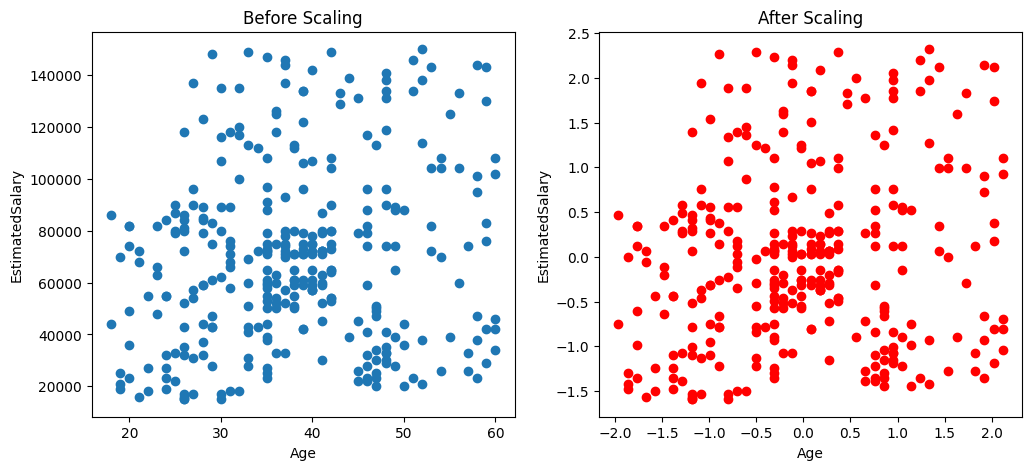

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],c='red')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
ax2.set_title('After Scaling')

<ipython-input-16-21e1755e4314>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train['Age'],ax=ax1,shade=True)
<ipython-input-16-21e1755e4314>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train['EstimatedSalary'],ax=ax1,shade=True)
<ipython-input-16-21e1755e4314>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_scaled['Age'],ax=ax2,shade=True)
<ipython-input-16-21e1755e4314>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2,shade=True)


<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='EstimatedSalary'>

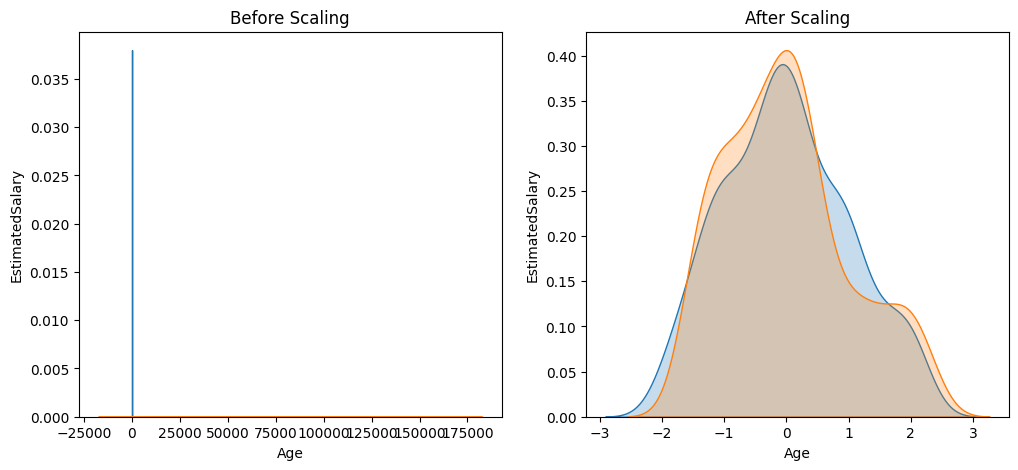

In [16]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))

# before
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
sns.kdeplot(X_train['Age'],ax=ax1,shade=True)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1,shade=True)



# after
ax2.set_title('After Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
sns.kdeplot(X_train_scaled['Age'],ax=ax2,shade=True)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2,shade=True)


Comparison of Distributions

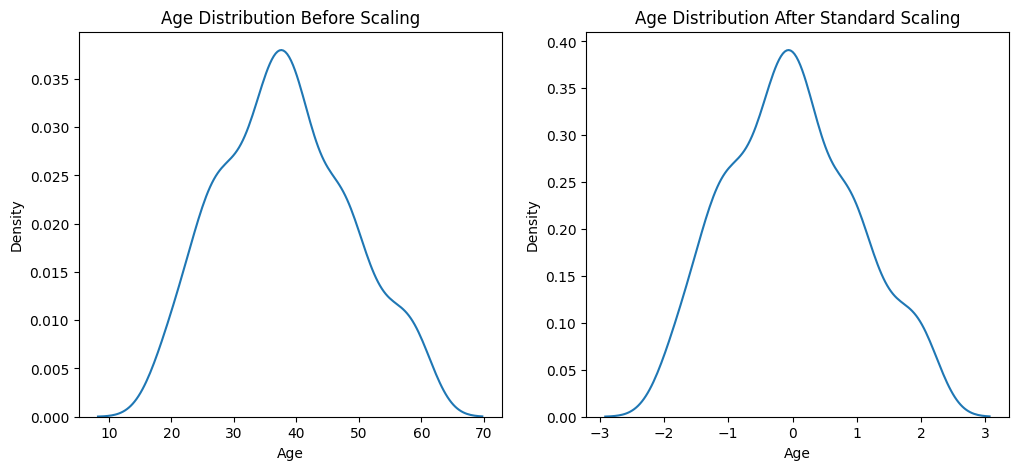

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()



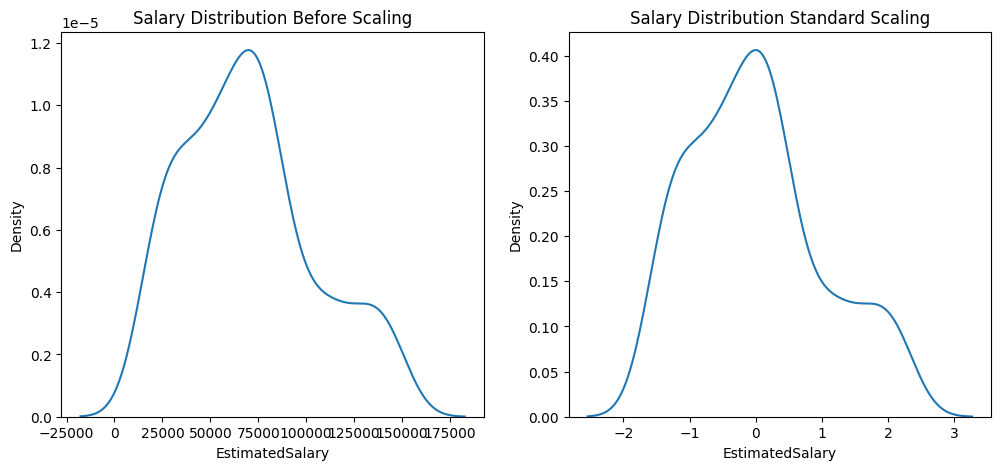

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr_Scaled = LogisticRegression()

In [21]:
lr.fit(X_train,y_train)
lr_Scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_Scaled.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.925


check Scaller in Desition Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [27]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [29]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.9125


In [30]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
